In [16]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import  pandas as pd
import  os
import math
from keras.models import Sequential, load_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [60]:
df = pd.read_csv("data/data_hour_v4.csv")

In [61]:
df2 = pd.read_csv("data/data_with_month.csv")
df['month'] = df2['month']
df

,Unnamed: 0,timestamp,Office_Marla,hour,month
0,0,2014-06-02 00:00:00,10.50,1,6
1,1,2014-06-02 01:00:00,8.25,1,6
2,2,2014-06-02 02:00:00,9.00,1,6
3,3,2014-06-02 03:00:00,9.00,1,6
4,4,2014-06-02 04:00:00,9.25,1,6
5,5,2014-06-02 05:00:00,10.25,1,6
6,6,2014-06-02 06:00:00,9.00,1,6
7,7,2014-06-02 07:00:00,12.00,1,6
8,8,2014-06-02 08:00:00,10.50,1,6
9,9,2014-06-02 09:00:00,9.50,1,6


In [62]:
# for i in range(len(df)):
# #   谷段
#     if df['timestamp'][i].hour >= 0 and df['timestamp'][i].hour <= 11:
#         df['hour'][i] = 1
# #   峰段
#     if df['timestamp'][i].hour >= 12 and df['timestamp'][i].hour <= 23:
#         df['hour'][i] = 3

In [63]:
# df.to_csv("C:\\Users\\Administrator\\Desktop\\大三上课程\\深度学习技术\\homeWork\\data_hour_v4.csv")

In [64]:
dataset = df[['Office_Marla']].values
dataset

array([[10.5 ],
       [ 8.25],
       [ 9.  ],
       ...,
       [10.75],
       [10.25],
       [10.5 ]])

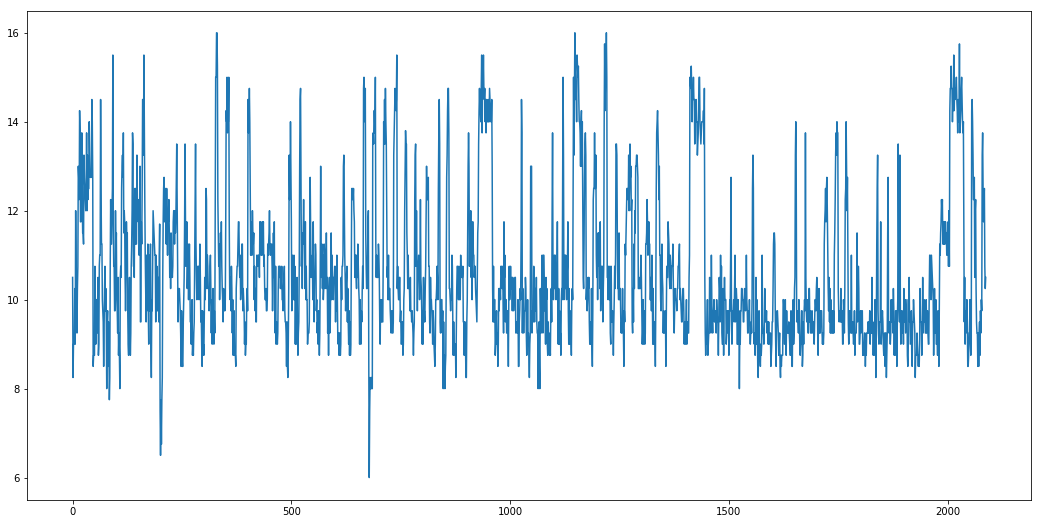

In [65]:
plt.figure(figsize=(18, 9))
plt.plot(dataset)
plt.show()

In [66]:
#归一化
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [67]:
hour = np.array(df['hour'])
hour = np.expand_dims(hour, axis=1)
scalerH = MinMaxScaler(feature_range=(0, 1))
hour = scalerH.fit_transform(hour)
hour

F:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]])

In [68]:
month = np.array(df['month'])
month = np.expand_dims(month, axis=1)
scalerH = MinMaxScaler(feature_range=(0, 1))
month = scalerH.fit_transform(month)
month

F:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]])

In [69]:
dataset = np.hstack((dataset,hour,month))

train_size = int(len(dataset) * 0.7)
trainlist = dataset[:train_size]
testlist = dataset[train_size:]

In [70]:
def create_dataset(dataset, look_back, out_num):
#这里的look_back与timestep相同
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back - out_num + 1):
        a = dataset[i:(i+look_back)]
        b = dataset[:,0][(i+look_back):(i+look_back+out_num)]
        dataX.append(a)
        dataY.append(b)
    return np.array(dataX),np.array(dataY)

In [71]:
# 用前3个预测后3个
look_back = 3
out_num = 3
trainX,trainY  = create_dataset(trainlist,look_back, out_num)
testX,testY = create_dataset(testlist,look_back, out_num)

In [72]:
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 3))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1] ,3))

In [73]:
n_steps_in, n_steps_out = look_back, out_num
# 此例中 n features = 3，因为输入有3个并行序列  
n_features = 3

# define model
model = Sequential()
model.add(LSTM(4, activation='relu', return_sequences=True, input_shape=(n_steps_in, n_features)))
model.add(LSTM(4, activation='relu'))
model.add(Dense(n_steps_out))
model.compile(optimizer='adam', loss='mse')
model.fit(trainX, trainY, epochs= 1000, batch_size=100, verbose=2)

Epoch 1/1000
15/15 - 0s - loss: 0.2566
Epoch 2/1000
15/15 - 0s - loss: 0.2370
Epoch 3/1000
15/15 - 0s - loss: 0.2181
Epoch 4/1000
15/15 - 0s - loss: 0.1995
Epoch 5/1000
15/15 - 0s - loss: 0.1807
Epoch 6/1000
15/15 - 0s - loss: 0.1611
Epoch 7/1000
15/15 - 0s - loss: 0.1345
Epoch 8/1000
15/15 - 0s - loss: 0.1015
Epoch 9/1000
15/15 - 0s - loss: 0.0691
Epoch 10/1000
15/15 - 0s - loss: 0.0425
Epoch 11/1000
15/15 - 0s - loss: 0.0278
Epoch 12/1000
15/15 - 0s - loss: 0.0248
Epoch 13/1000
15/15 - 0s - loss: 0.0230
Epoch 14/1000
15/15 - 0s - loss: 0.0216
Epoch 15/1000
15/15 - 0s - loss: 0.0207
Epoch 16/1000
15/15 - 0s - loss: 0.0200
Epoch 17/1000
15/15 - 0s - loss: 0.0195
Epoch 18/1000
15/15 - 0s - loss: 0.0191
Epoch 19/1000
15/15 - 0s - loss: 0.0187
Epoch 20/1000
15/15 - 0s - loss: 0.0185
Epoch 21/1000
15/15 - 0s - loss: 0.0183
Epoch 22/1000
15/15 - 0s - loss: 0.0180
Epoch 23/1000
15/15 - 0s - loss: 0.0179
Epoch 24/1000
15/15 - 0s - loss: 0.0177
Epoch 25/1000
15/15 - 0s - loss: 0.0175
Epoch 26/

Epoch 204/1000
15/15 - 0s - loss: 0.0133
Epoch 205/1000
15/15 - 0s - loss: 0.0133
Epoch 206/1000
15/15 - 0s - loss: 0.0132
Epoch 207/1000
15/15 - 0s - loss: 0.0132
Epoch 208/1000
15/15 - 0s - loss: 0.0132
Epoch 209/1000
15/15 - 0s - loss: 0.0132
Epoch 210/1000
15/15 - 0s - loss: 0.0131
Epoch 211/1000
15/15 - 0s - loss: 0.0131
Epoch 212/1000
15/15 - 0s - loss: 0.0131
Epoch 213/1000
15/15 - 0s - loss: 0.0132
Epoch 214/1000
15/15 - 0s - loss: 0.0131
Epoch 215/1000
15/15 - 0s - loss: 0.0131
Epoch 216/1000
15/15 - 0s - loss: 0.0130
Epoch 217/1000
15/15 - 0s - loss: 0.0130
Epoch 218/1000
15/15 - 0s - loss: 0.0130
Epoch 219/1000
15/15 - 0s - loss: 0.0130
Epoch 220/1000
15/15 - 0s - loss: 0.0130
Epoch 221/1000
15/15 - 0s - loss: 0.0129
Epoch 222/1000
15/15 - 0s - loss: 0.0130
Epoch 223/1000
15/15 - 0s - loss: 0.0130
Epoch 224/1000
15/15 - 0s - loss: 0.0129
Epoch 225/1000
15/15 - 0s - loss: 0.0130
Epoch 226/1000
15/15 - 0s - loss: 0.0129
Epoch 227/1000
15/15 - 0s - loss: 0.0129
Epoch 228/1000
1

Epoch 404/1000
15/15 - 0s - loss: 0.0121
Epoch 405/1000
15/15 - 0s - loss: 0.0121
Epoch 406/1000
15/15 - 0s - loss: 0.0121
Epoch 407/1000
15/15 - 0s - loss: 0.0121
Epoch 408/1000
15/15 - 0s - loss: 0.0121
Epoch 409/1000
15/15 - 0s - loss: 0.0122
Epoch 410/1000
15/15 - 0s - loss: 0.0122
Epoch 411/1000
15/15 - 0s - loss: 0.0121
Epoch 412/1000
15/15 - 0s - loss: 0.0122
Epoch 413/1000
15/15 - 0s - loss: 0.0122
Epoch 414/1000
15/15 - 0s - loss: 0.0121
Epoch 415/1000
15/15 - 0s - loss: 0.0121
Epoch 416/1000
15/15 - 0s - loss: 0.0122
Epoch 417/1000
15/15 - 0s - loss: 0.0122
Epoch 418/1000
15/15 - 0s - loss: 0.0122
Epoch 419/1000
15/15 - 0s - loss: 0.0121
Epoch 420/1000
15/15 - 0s - loss: 0.0121
Epoch 421/1000
15/15 - 0s - loss: 0.0121
Epoch 422/1000
15/15 - 0s - loss: 0.0121
Epoch 423/1000
15/15 - 0s - loss: 0.0121
Epoch 424/1000
15/15 - 0s - loss: 0.0121
Epoch 425/1000
15/15 - 0s - loss: 0.0121
Epoch 426/1000
15/15 - 0s - loss: 0.0121
Epoch 427/1000
15/15 - 0s - loss: 0.0121
Epoch 428/1000
1

Epoch 604/1000
15/15 - 0s - loss: 0.0120
Epoch 605/1000
15/15 - 0s - loss: 0.0119
Epoch 606/1000
15/15 - 0s - loss: 0.0119
Epoch 607/1000
15/15 - 0s - loss: 0.0119
Epoch 608/1000
15/15 - 0s - loss: 0.0119
Epoch 609/1000
15/15 - 0s - loss: 0.0119
Epoch 610/1000
15/15 - 0s - loss: 0.0119
Epoch 611/1000
15/15 - 0s - loss: 0.0119
Epoch 612/1000
15/15 - 0s - loss: 0.0119
Epoch 613/1000
15/15 - 0s - loss: 0.0119
Epoch 614/1000
15/15 - 0s - loss: 0.0119
Epoch 615/1000
15/15 - 0s - loss: 0.0119
Epoch 616/1000
15/15 - 0s - loss: 0.0119
Epoch 617/1000
15/15 - 0s - loss: 0.0119
Epoch 618/1000
15/15 - 0s - loss: 0.0119
Epoch 619/1000
15/15 - 0s - loss: 0.0119
Epoch 620/1000
15/15 - 0s - loss: 0.0119
Epoch 621/1000
15/15 - 0s - loss: 0.0119
Epoch 622/1000
15/15 - 0s - loss: 0.0119
Epoch 623/1000
15/15 - 0s - loss: 0.0119
Epoch 624/1000
15/15 - 0s - loss: 0.0119
Epoch 625/1000
15/15 - 0s - loss: 0.0119
Epoch 626/1000
15/15 - 0s - loss: 0.0119
Epoch 627/1000
15/15 - 0s - loss: 0.0119
Epoch 628/1000
1

Epoch 804/1000
15/15 - 0s - loss: 0.0118
Epoch 805/1000
15/15 - 0s - loss: 0.0118
Epoch 806/1000
15/15 - 0s - loss: 0.0118
Epoch 807/1000
15/15 - 0s - loss: 0.0118
Epoch 808/1000
15/15 - 0s - loss: 0.0118
Epoch 809/1000
15/15 - 0s - loss: 0.0118
Epoch 810/1000
15/15 - 0s - loss: 0.0118
Epoch 811/1000
15/15 - 0s - loss: 0.0118
Epoch 812/1000
15/15 - 0s - loss: 0.0118
Epoch 813/1000
15/15 - 0s - loss: 0.0118
Epoch 814/1000
15/15 - 0s - loss: 0.0118
Epoch 815/1000
15/15 - 0s - loss: 0.0118
Epoch 816/1000
15/15 - 0s - loss: 0.0119
Epoch 817/1000
15/15 - 0s - loss: 0.0119
Epoch 818/1000
15/15 - 0s - loss: 0.0118
Epoch 819/1000
15/15 - 0s - loss: 0.0119
Epoch 820/1000
15/15 - 0s - loss: 0.0119
Epoch 821/1000
15/15 - 0s - loss: 0.0119
Epoch 822/1000
15/15 - 0s - loss: 0.0118
Epoch 823/1000
15/15 - 0s - loss: 0.0118
Epoch 824/1000
15/15 - 0s - loss: 0.0118
Epoch 825/1000
15/15 - 0s - loss: 0.0118
Epoch 826/1000
15/15 - 0s - loss: 0.0118
Epoch 827/1000
15/15 - 0s - loss: 0.0118
Epoch 828/1000
1

In [15]:
# model.save("C:\\Users\\Administrator\\Desktop\\大三上课程\\深度学习技术\\homeWork\\lstm_hour_4.h5")

In [16]:
# model = load_model("model/lstm_hour_4.h5")

In [74]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [75]:
#反归一化
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(trainY.reshape(trainY.shape[0], trainY.shape[1]))
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(testY.reshape(testY.shape[0], testY.shape[1]))

In [80]:
def convert(a):
    a1 = np.array([a[:, 0][0]])
    a2 = np.array([(a[:, 0][1] + a[:, 1][0]) / 2])
    a3 = (a[:, 0][2: ] + a[:, 1][1: -1] + a[:, 2][0: -2]) / 3
    a4 = np.array([(a[:, 1][-1] + a[:, 2][-2]) / 2])
    a5 = np.array([a[:, 2][-1]])
    a_last = np.concatenate([a1,a2,a3,a4,a5])
    return a_last

In [81]:
trainPredict = convert(trainPredict)
testPredict = convert(testPredict)
trainY = convert(trainY)
testY = convert(testY)

In [82]:
predict = np.append(trainPredict, testPredict)
y = np.append(trainY, testY)

In [83]:
# 求均方误差(1)  所有一起
trainScore = math.sqrt(mean_squared_error(trainY.flatten(), trainPredict.flatten()))
print('Train Score: %.3f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY.flatten(), testPredict.flatten()))
print('Test Score: %.3f RMSE' % (testScore))

Train Score: 0.990 RMSE
Test Score: 1.057 RMSE


In [118]:
trainScore1 = mean_squared_error(trainY.flatten(), trainPredict.flatten())
print('Train Score: %.3f MSE' % (trainScore1))
testScore1 = mean_squared_error(testY.flatten(), testPredict.flatten())
print('Test Score: %.3f MSE' % (testScore1))

Train Score: 0.954 MSE
Test Score: 0.935 MSE


In [119]:
trainScore1 = mean_squared_error(trainY.flatten(), trainPredict.flatten())
print('Train Score: %.3f MSE' % (trainScore1))
testScore1 = mean_squared_error(testY.flatten(), testPredict.flatten())
print('Test Score: %.3f MSE' % (testScore1))

Train Score: 0.954 MSE
Test Score: 0.935 MSE


In [120]:
# 求均方误差(2)  使用最终的均值结果
trainScore = math.sqrt(mean_squared_error(trainY, trainPredict))
print('Train Score: %.3f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY, testPredict))
print('Test Score: %.3f RMSE' % (testScore))

Train Score: 0.977 RMSE
Test Score: 0.967 RMSE


## 所有数据

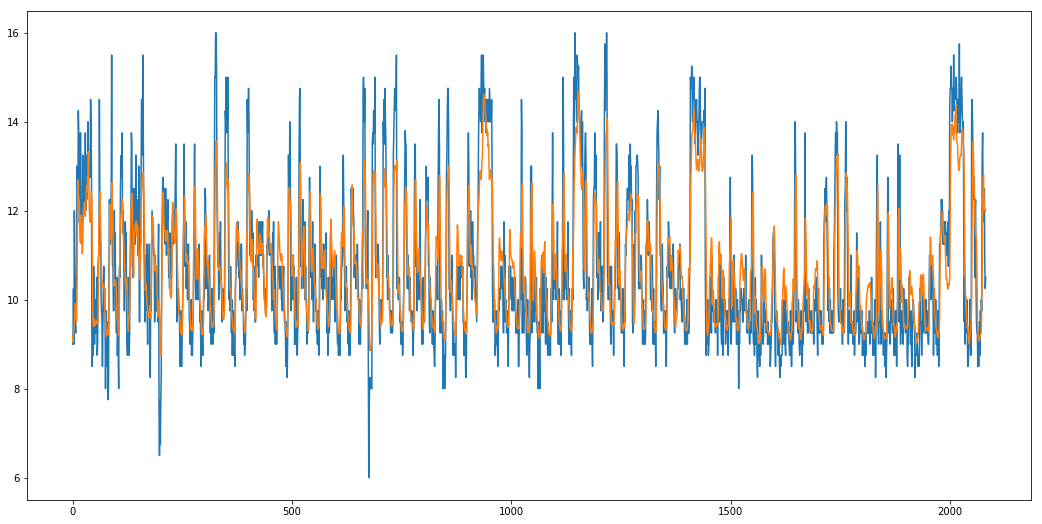

In [121]:
plt.figure(figsize=(18, 9))
plt.plot(y)
plt.plot(predict)
plt.show()

## 训练集

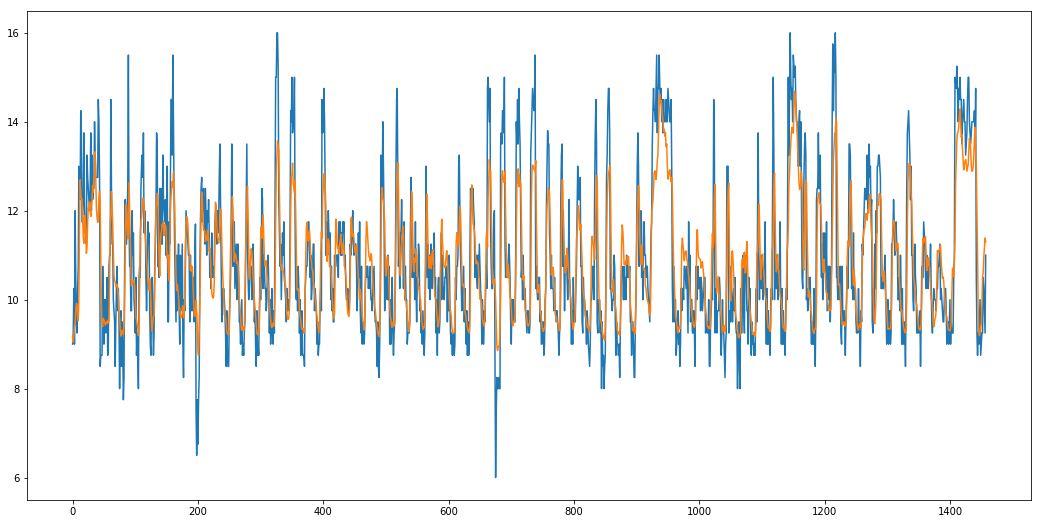

In [122]:
plt.figure(figsize=(18, 9))
plt.plot(trainY)
plt.plot(trainPredict)
plt.show()

## 测试集

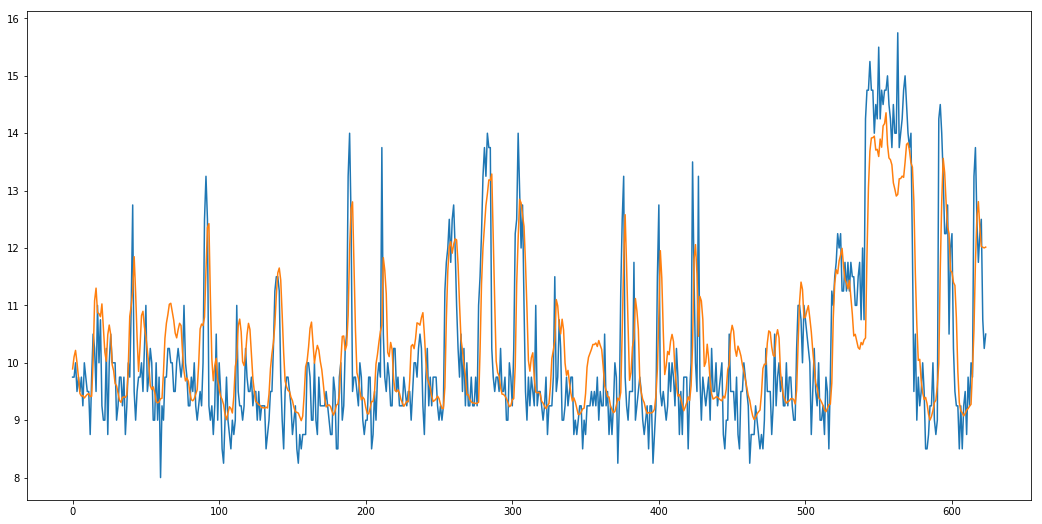

In [123]:
plt.figure(figsize=(18, 9))
plt.plot(testY)
plt.plot(testPredict)
plt.show()

## 前200条数据 （训练集）

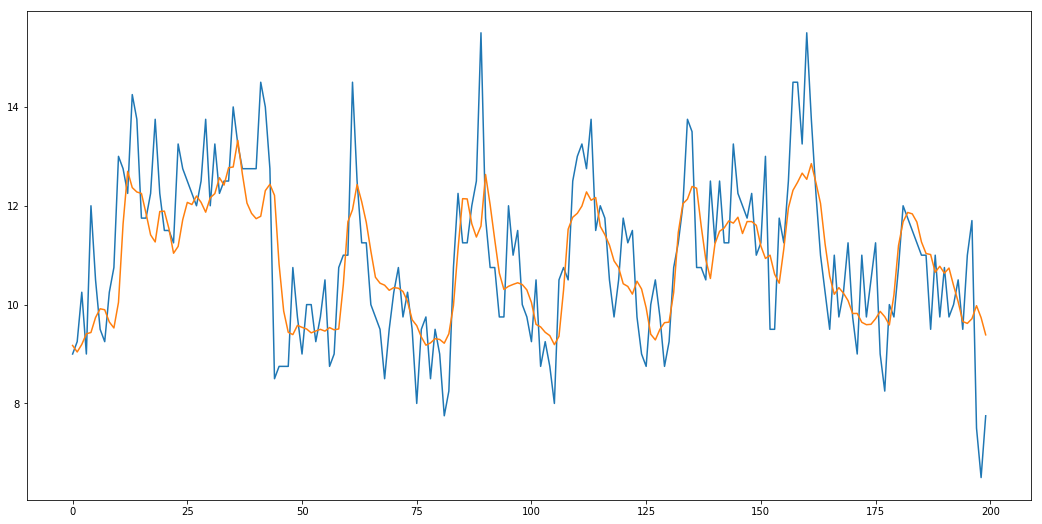

In [124]:
plt.figure(figsize=(18, 9))
plt.plot(y[:200])
plt.plot(predict[:200])
plt.show()

## 后200条数据 （测试集）

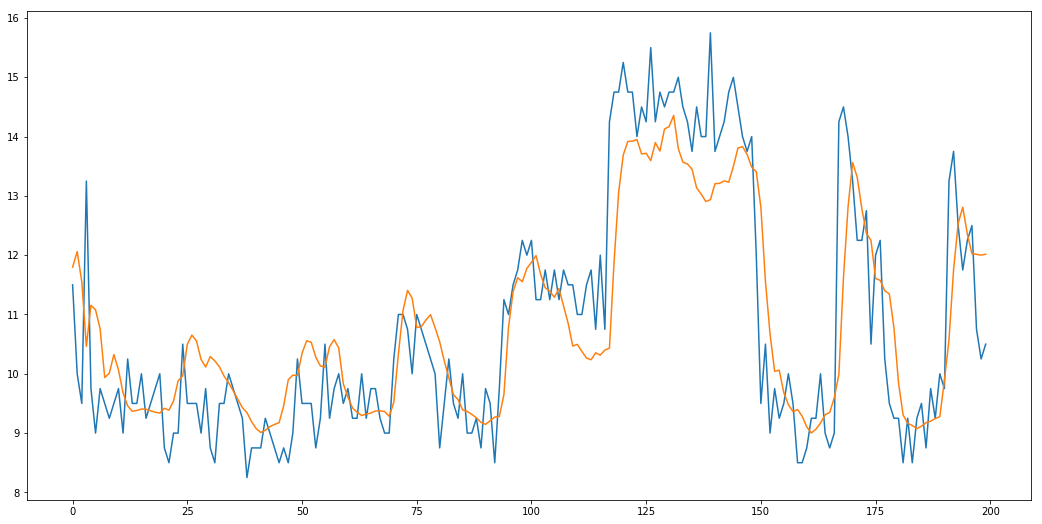

In [125]:
plt.figure(figsize=(18, 9))
plt.plot(y[-200:])
plt.plot(predict[-200:])
plt.show()

## 总体结果 

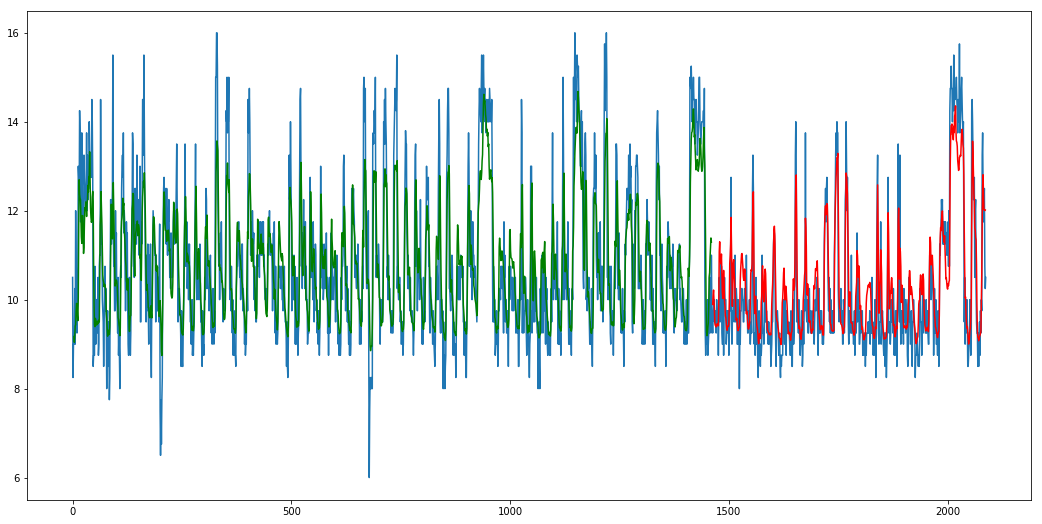

In [126]:
plt.figure(figsize=(18, 9))

# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset[:,0])
trainPredictPlot[:] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset[:,0])
testPredictPlot[:] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)-1:len(dataset)-1] = testPredict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset)[:,0])
plt.plot(trainPredictPlot,'g')
plt.plot(testPredictPlot,'r')
plt.show()